# 13_MiniAlexNet-Supervised-SBATCH

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.load_MNIST import load_MNIST

from src.training_results import CNNSupervisedTrainingResults
from src.load_MNIST import get_mnist_pairs_loader

In [3]:
train_dataloader, val_dataloader, test_dataloader = load_MNIST(
    root='./data', subset_frac=0.05, 
    batch_size=32, validation_ratio=6, seed=42
)

# Quick runs

```bash
$ sbatch sbatch_scripts/13_no-prune_CNN_fast.sh 
Submitted batch job 56940263
$ sbatch sbatch_scripts/13_activity-prune_CNN_fast_MNIST.sh 
Submitted batch job 56940277
$ sbatch sbatch_scripts/13_random-prune_CNN_fast_MNIST.sh 
Submitted batch job 56940295
```

In [4]:
no_prune_results = CNNSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/13/no_prune_CNN_fast/sbatch-56942275_ds-MNIST_ic-1_bs-32_sf-0.05_vr-6_nti-10_lmd-10_pmt-NoPrune_g-0.1_lr-0.001_s-4")

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'no_prune_CNN_fast Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

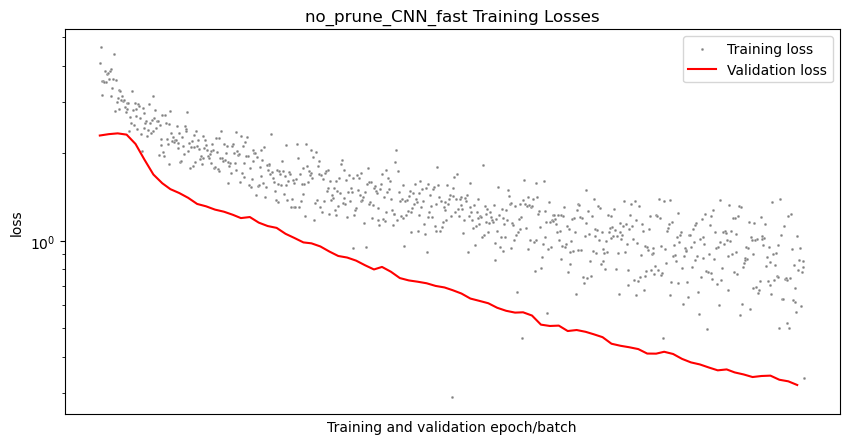

In [5]:
no_prune_results.plot_training_losses()

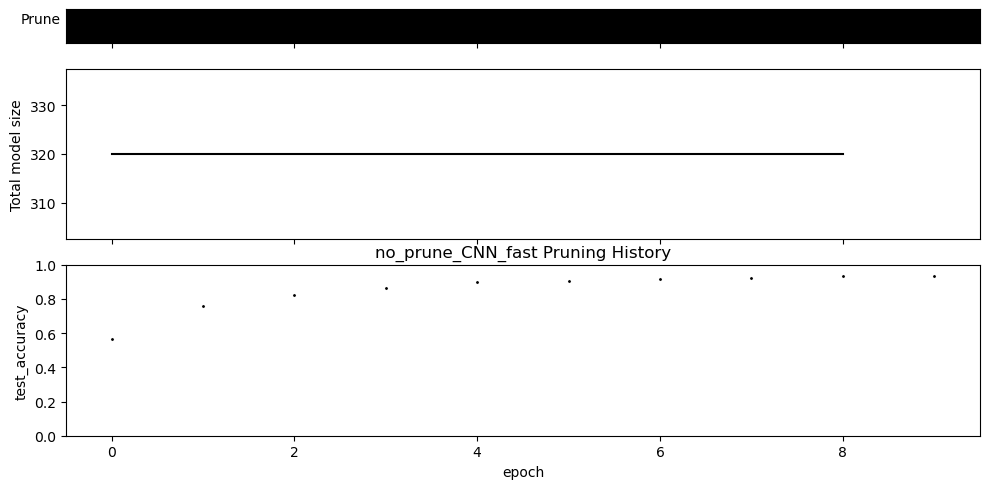

In [8]:
fig, ax = no_prune_results.plot_pruning()

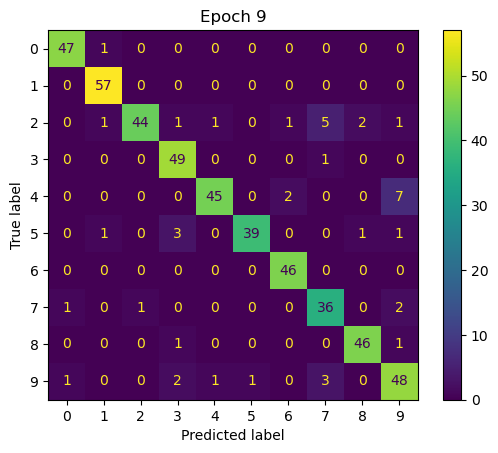

In [9]:
no_prune_results.set_trained_model(9)
no_prune_results.plot_confusion_matrix(test_dataloader)

## Activity prune

In [10]:
activity_prune_results = CNNSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/13/no_prune_CNN_fast/sbatch-56944523_ds-MNIST_ic-1_bs-32_sf-0.05_vr-6_nti-10_lmd-10_pmt-Activity_g-0.1_lr-0.001_s-4")

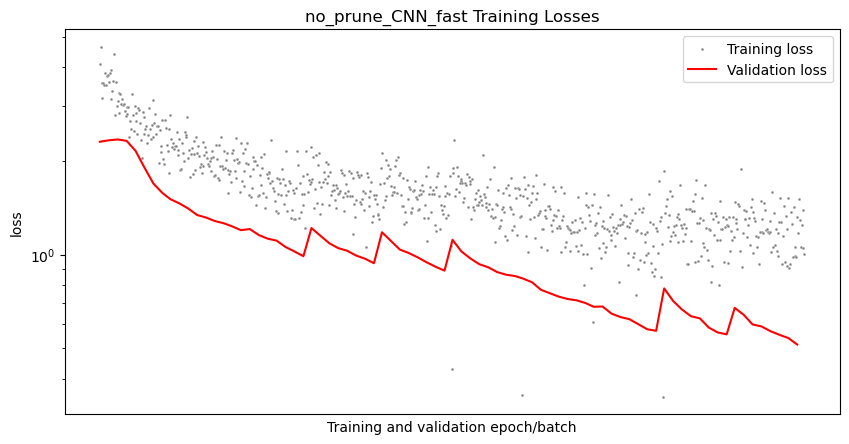

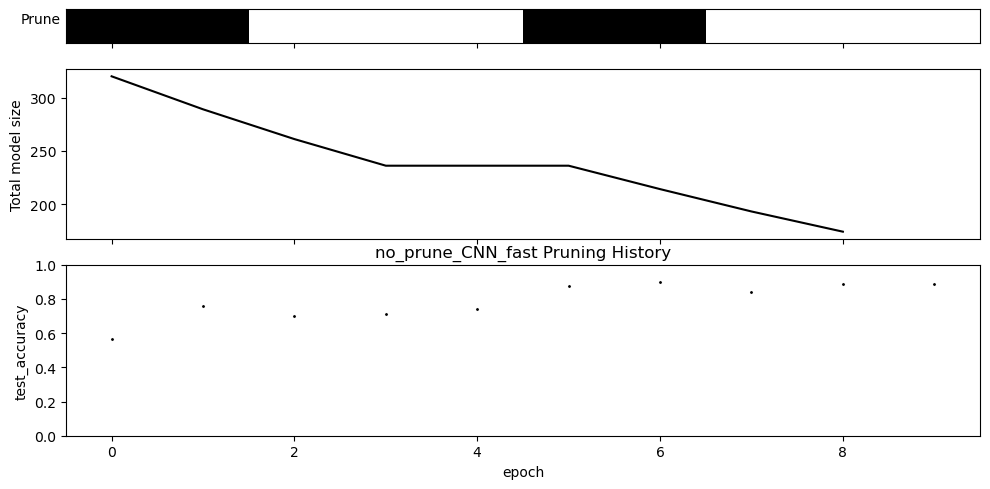

In [11]:
fig, ax = activity_prune_results.plot_training_losses()
fig, ax = activity_prune_results.plot_pruning()

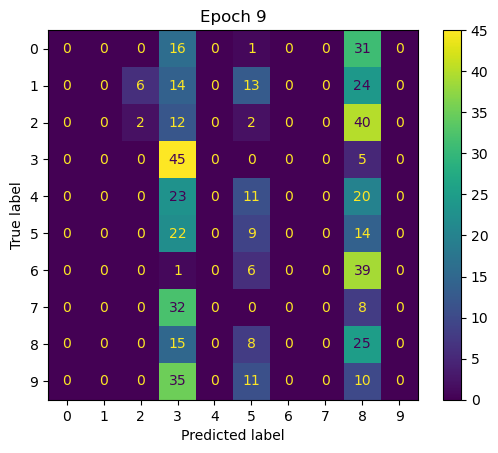

In [14]:
activity_prune_results.set_trained_model(9)
activity_prune_results.plot_confusion_matrix(test_dataloader)

ValueError: array length 9 does not match index length 10

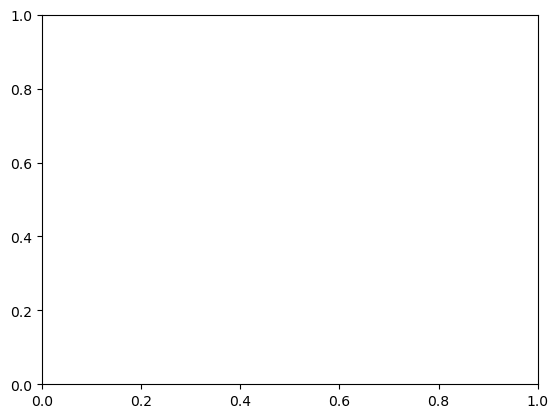

In [15]:
activity_prune_results.plot_model_size_vs_performance()